## Time Series Forecasting 
![](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fmoneydotcomvip.files.wordpress.com%2F2017%2F03%2F170314_stocks.jpg&w=800&c=sc&poi=face&q=85)

*<sup><sub>Taken from http://money.com/money/4697361/out-of-favor-stock-market-picks/</sup></sub>*

## Time Series Forecasting
   ![](https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/07/09/financial-time-series-2.gif)
*<sub><sup>Taken from https://aws.amazon.com/blogs/machine-learning/forecasting-time-series-with-dynamic-deep-learning-on-aws/</sup></sub>,* 

## Time Series Preprocessing

### Stationary timeseries
- Stationary: mean, variance, covariance do not change over time

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/ns5-e1536673990684.png)
*Taken from https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/*

### Moving Averages
- removes effect of random variation
- smooth out short-term fluctuations
- mean of successuve smaller sets of numbers


<div align="center"> $ M_t = \frac{X_t + X_{t-1} + \cdots + X_{t-N+1}}{N} \,  $ </div> 

### Moving average with a window size 50:

![](data/moving_average.gif)

- coefficient of alpha represents the degree of weighting decrease (between 0 and 1)
- Y_t value at time period t
- S_t is EMA value at time t


### Exponential moving average

- weighting factors that decrease exponentially (never zero)


<div align="center"> $   
    S_t=\left\{
                \begin{array}{ll}
                      Y_1,       &  t=1 \\
                      \alpha \cdot Y_t + (1-\alpha) \cdot S_{t-1},  & t>1
                \end{array}
              \right.
   $ </div> 


- if there are recent large outliers exponential moving average can more quickly follow them, because it puts higher weight to more recent values

![](data/ewm.gif)

## Time Series Models

### Traditional ML approaches:
- Autoregressive models
- Integration models
- Moving average models
- Autoregressive moving average (ARMA)
- Autoregressive integrated moving average (ARIMA)

### Deep Learning approaches:
- RNNs, LSTMs
- LSTNet https://arxiv.org/abs/1703.07015
- DeepAR https://arxiv.org/abs/1704.04110

### Autoregressive Models

- linear combination of predictors
- value at the current time $t$ depends on the values at time $t-1$, $t-2$, etc.


<div align="center"> $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}, $ </div> 

### Simulate an autoregressive timeseries

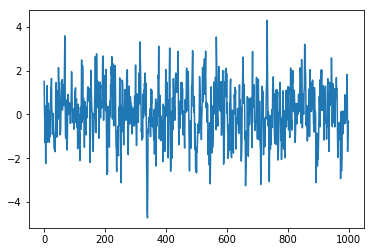

In [89]:
# set seed 
np.random.seed(1)

# initialize x and w
x = w = np.random.normal(size=1000)

# create timeseries
for t in range(1000):
    x[t] = 0.6*x[t-1] + w[t]

# plot
plt.plot(x)
plt.show()

### Find the best AR model that fits the data

In [91]:
import statsmodels.tsa.api as smt

mdl = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')

print('\nalpha estimate: {:3.5f} | best lag order = {}'.format(mdl.params[0], est_order))


alpha estimate: 0.58227 | best lag order = 1


### Moving Average Models


- linear combination of predictors
- value at the current time  $t$ depends on the past **forecast errors** at timestep $t-1$, $t-2$, etc.


<div align="center"> $ y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q}$  </div> 

In [55]:
# generate timeseries
x = smt.arma_generate_sample(ar=np.r_[1, 0], ma=np.r_[1, 0.5], nsample=1000) 

#fit MA model
mdl = smt.ARMA(x, order=(0, 1)).fit(maxlag=30, method='mle', trend='nc')

print('\nalpha estimate: {:3.5f} | best lag order = {}'.format(mdl.params[0], est_order))



alpha estimate: 0.51437 | best lag order = 1


### ARIMA
Parameters:
- number of lag observations
- number of times that raw observations are differenced
- size of moving average window


<div align="center"> $
\begin{equation}
  y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}
\end{equation}
$ </div> 

- we need to identify first how often we need to differentiate the time series to make it stationary
- you can verify that by checking the autocorrelation of the timeseries
- if a timeseries has seasonal trends then you would apply seasonal differencing
- problem in ARIMA: you may have to do a hyperparameter tuning to find the right set of parameters. You want to have a model that gives you the greates degree of freedom with the fewest amount of parameters

### ARIMA - Check stationarity

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:4137: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


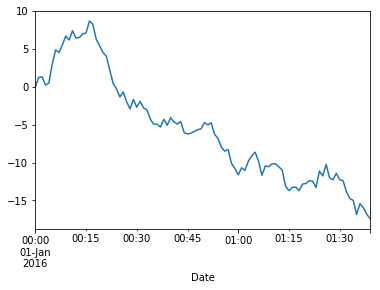

In [56]:
import pandas as pd

df = pd.Series.from_csv("data/example_time_series.csv", header=0)
df.plot()

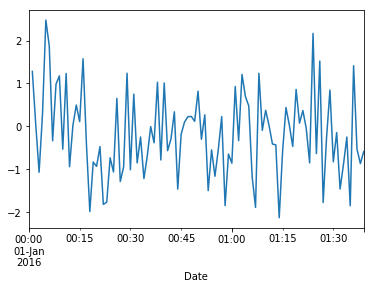

In [57]:
df.diff().plot()

### Check autocorrelation

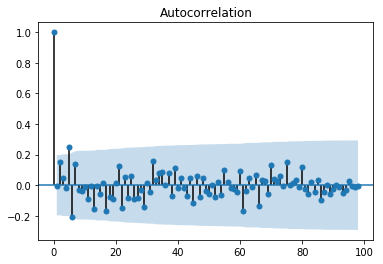

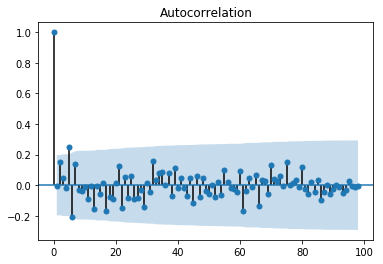

In [58]:
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.diff()[1:])

- the autocorrelation and partial autocorrelation plots allow us to estimate the right number of ARIMA parameters
- the estimation requires quite some experience and decision may not be striaghtforward. you may want to go for a grid search.
- there are some best practices that you can apply e.g. if autocorrelation plot may show a sine wave shape, then you may want to choose 2 autoregressive parameters

### For comparison - without differencing

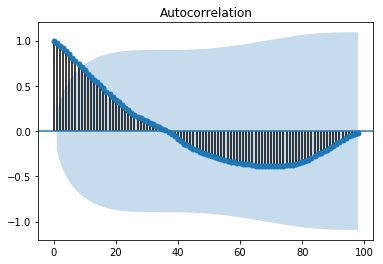

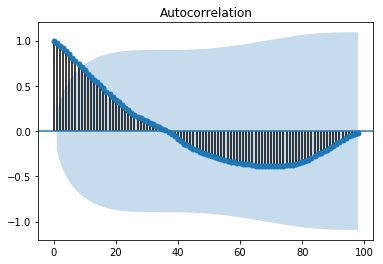

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df[1:])

In [87]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order=(5,2,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Value   No. Observations:                   98
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -136.423
Method:                       css-mle   S.D. of innovations              0.966
Date:                Sun, 09 Jun 2019   AIC                            286.846
Time:                        17:35:56   BIC                            304.941
Sample:                    01-01-2016   HQIC                           294.165
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0108      0.033     -0.332      0.741      -0.075       0.053
ar.L1.D2.Value    -0.8118      0.101     -8.070      0.000      -1.009      -0.615
ar.L2.D2.Value    -0.5306      0.126

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


- To test the quality of a model we can use the R2 score which measure the proportion of the variance in the dependant variable that is predicted from independant variables
- It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model
- Values close to 1 means that the model is predicting extremally well


### Make predictions

In [88]:
predicted = model_fit.predict(79,100)
p1 = predicted["2016-01-01 01:20:00":"2016-01-01 01:39:00"]
p2 = df.diff().diff()["2016-01-01 01:20:00":"2016-01-01 01:39:00"]
print(metrics.r2_score(p1,p2))

0.3860676095802207


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


### Plot residuals

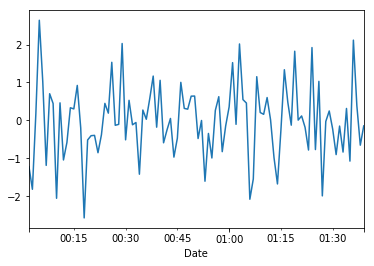

In [64]:
model_fit.resid.plot()

### Plot residuals

Residuals should follow a Gaussian distirbuton and mean should be 0.

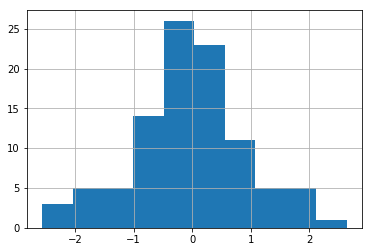

In [66]:
model_fit.resid.hist()

### Conclusion

- ARIMA, AR, MA models work well for univariate time series
- they require stationarity
- can only capture linearities

## Recurrent Neural Networks

### Recurrent Neural Networks

![](https://cdn-images-1.medium.com/max/1600/1*SKGAqkVVzT6co-sZ29ze-g.png)
*<sub><sub>Taken from https://medium.com/deeplearningbrasilia/deep-learning-recurrent-neural-networks-f9482a24d010</sub></sub>*

### Recurrent Neural Networks
- exhibit temporal dynamic behavior
- internal state 
- process sequences of inputs
![](https://cdn-images-1.medium.com/max/800/1*AQ52bwW55GsJt6HTxPDuMA.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Recurrent Neural Networks

![](https://cdn-images-1.medium.com/max/800/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Recurrent Neural Networks
- concatenate input vector and hidden state
- output is the new hidden state
![](https://cdn-images-1.medium.com/max/800/1*WMnFSJHzOloFlJHU6fVN-g.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Recurrent Neural Networks
- *tanh* squishes value between -1 and +1
![](https://cdn-images-1.medium.com/max/800/1*iRlEg1GBKRzGTre5aOQUCg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*


<div align="center"> What could be the problems of RNNs? </div>   

### Problem with RNNs
- vanshing gradients
- short-term memory

![](https://cdn-images-1.medium.com/max/800/1*LgbEFcGiUpseZ--M7wuZhg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Long Short Term Memory (LSTM)
- Input Gate
- Output Gate
- Forget Gate

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width="1000" height="400"/>


*<sup><sub>Taken from https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sup></sub>*

### Long Short Term Memory (LSTM)
- input and hidden state are concatenaned
- the closer $f_t$ is to 0 the more likely it will be forgotten
- $f_t$ is added to the cell state $c_t$
![](https://cdn-images-1.medium.com/max/800/1*GjehOa513_BgpDDP6Vkw2Q.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Long Short Term Memory (LSTM)

- vector of new candidate values that could be added to the cell state 
- input gate decides what is relevant to add from current step

![](https://cdn-images-1.medium.com/max/800/1*TTmYy7Sy8uUXxUXfzmoKbA.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Long Short Term Memory (LSTM)
- cell state is multiplied with forget vector
- output of input gate is added to cell state

![](https://cdn-images-1.medium.com/max/1600/1*S0rXIeO_VoUVOyrYHckUWg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Long Short Term Memory (LSTM)

- previous hidden state and current input goes into *sigmoid*
- new cell state goes into *tanh*
- new hidden state is the product of the outputs 

![](https://cdn-images-1.medium.com/max/1600/1*VOXRGhOShoWWks6ouoDN3Q.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### LSTMs and its applications

#### Sentiment Analysis

![](https://openai.com/content/images/2017/04/low_res_maybe_faster.gif)
*Taken from https://openai.com/blog/unsupervised-sentiment-neuron/*

### LSTMs and its applications 

- Speech recognition
- Text generation  
- Music Generation
- Machine translation
- Image Captioning
- OCR optical character recognition
- Sequence tagging
- Video recognition

        

### Bidirectional RNNs

![](http://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-bidirectional.png)
*<sup><sub>Taken from https://towardsdatascience.com/understanding-bidirectional-rnn-in-pytorch-5bd25a5dd66 </sup></sub>*

### BiLSTMs and its applications
- Deep contextualized word representations https://arxiv.org/pdf/1802.05365.pdf
- Named Entity Recognition with Bidirectional LSTM-CNNs https://arxiv.org/pdf/1511.08308v5.pdf
- End-to-end Sequence Labeling via Bi-directional LSTM-CNNs-CRF https://arxiv.org/pdf/1603.01354v5.pdf
- RWTH ASR Systems for LibriSpeech: Hybrid vs Attention - w/o Data Augmentatio https://arxiv.org/abs/1905.03072

### Gated Recurrent Unit (GRU)
<img src="https://cdn-images-1.medium.com/max/1600/1*jhi5uOm9PvZfmxvfaCektw.png" width="700" height="400"/>


*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

For more details on RNN, LSTM, GRU, check out the following great tutorials:
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21 
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/

## Timeseries forecasting with LSTMs

### Example: predict stock price 

### Read data


In [15]:
import pandas as pd
import numpy as np
import mxnet as mx
from mxnet import gluon
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

df = pd.read_csv('data/AMZN.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-24,64.31250,64.68750,58.0000,58.75000,58.75000,14253800
1,1999-05-25,58.62500,60.56250,55.6875,55.78125,55.78125,15510200
2,1999-05-26,56.59375,60.93750,52.2500,60.46875,60.46875,21158600
3,1999-05-27,59.81250,60.28125,57.0000,57.28125,57.28125,13573400
4,1999-05-28,57.81250,60.18750,56.0000,59.37500,59.37500,9680200


### Plot data

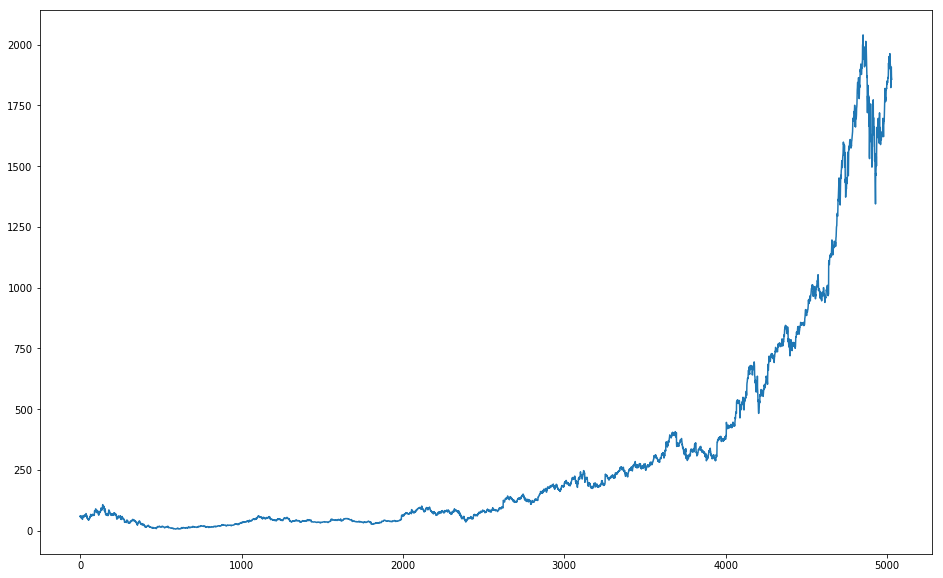

In [16]:
plt.figure(figsize=(16,10))
plt.plot(df['Close'])

### Data normalization

Min-Max Normalization:

<div align="center"> $ y = \frac{x-x_{min}}{x_{max} - x_{min}}$ </div>   



<div align="center"> Disadvantages of Min-Max normalization? </div>   

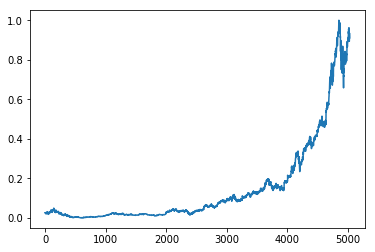

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df[['Close']].values
plt.plot(scaler.fit_transform(data.reshape(-1,1)))

### Data normalization

Standardize:

<div align="center"> $ y = \frac{x-\bar{x}} {\sigma}$  </div>
where 
<div align="center">  $ \sigma = \frac{ \sqrt {  \sum (x - \bar{x})^2}}{count(x)} $ </div>

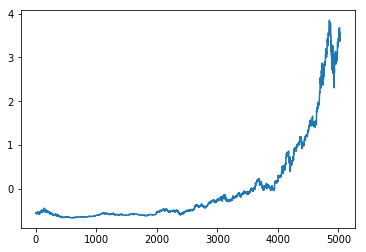

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df[['Close']].values
plt.plot(scaler.fit_transform(data.reshape(-1,1)))


<div align="center"> Disadvantages of Standardization? </div> 

### Window normalization
- Input: non-stationary time series
- Create sequences
- Normalize sequences:

<div align="center"> $x_i = \frac{x_i}{x_0} - 1$  </div>


![](data/timeseries.gif)

In [44]:
def create_normalized_data(data, sequence_length):
    
    # number of time series values
    n_samples = data.shape[0]  
    
    # create empty matrices n_samples x sequence_length x 1
    x = np.zeros((n_samples - sequence_length, sequence_length - 1, 1), dtype=np.float32)
    y = np.zeros((n_samples - sequence_length, 1), dtype=np.float32)
    
    # create normalized sequences
    for i in range(0, n_samples - sequence_length): 
        
        # get window
        window = data[i : i + sequence_length,:] 
        
        # normalize
        normalized = [((float(p) / float(window[0])) - 1) for p in window[:]]    
        
        # assign 
        x[i,:,0]   = normalized[:-1]
        y[i,0]     = normalized[-1]
        
    return x, y

### Define Dataloader

In [9]:
num_epochs=5
batch_size=128
ctx = mx.cpu()

# split train/test
n = int(data.shape[0] * 0.85)

# how many past time steps to consider
sequence_length = 20

# get normalized train and test dataset 
x_train, y_train = create_normalized_data(data[:n,:], sequence_length)
x_test, y_test   = create_normalized_data(data[n:,:], sequence_length)

# create Dataloader
dataset = gluon.data.ArrayDataset(x_train, y_train)
train_dataloader = gluon.data.DataLoader(dataset, batch_size=batch_size, last_batch="rollover", shuffle=True)

### Plot normalized data

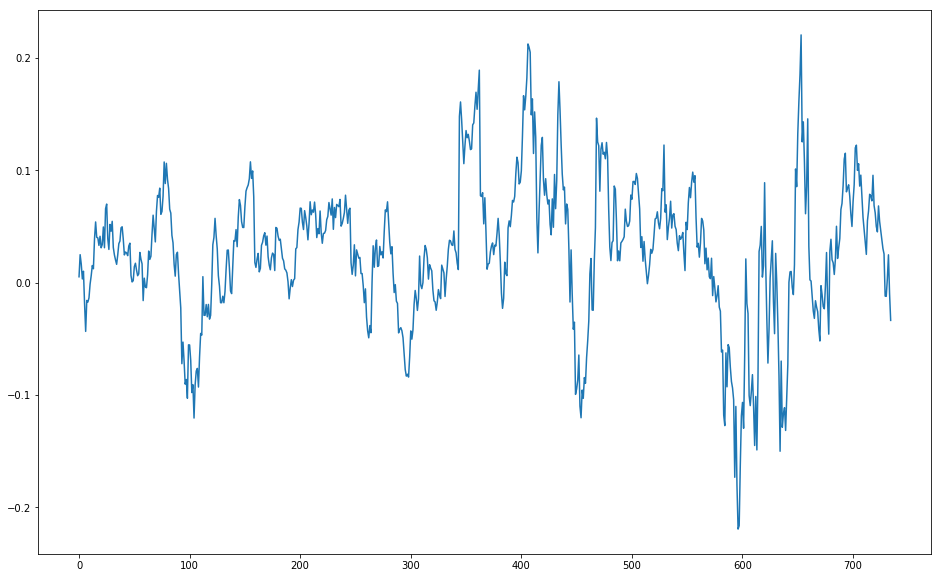

In [10]:
plt.figure(figsize=(16,10))
plt.plot(y_test)

## Simple baseline - persistence model

Take current price at timestep $t_0$ as prediction for next timesteps

Evaluation:
- R2 score: coefficient of determination

<div align="center"> 
$R^2 = 1 - \frac{\sum e^2}{\sum(y_i-\bar y )^2}$
where $e_i = y_i - f_i$
  </div>

In [11]:
from sklearn import metrics

# 1 Timesteps
predictions = y_test[1:-1]
print("R2 Score:", metrics.r2_score(predictions, y_test[0:-2]))
     

Absolute error: 12.652656
R2 Score: 0.8478560562075556


## Simple baseline - persistence model

Take current price at timestep $t_0$ as prediction for next 25 timesteps

In [12]:
# 25 Timesteps
predictions = np.zeros((y_test.shape[0]))
for i in range(0,y_test.shape[0],25):
    predictions[i:i+25] = y_test[i]
  
print("R2 Score:", metrics.r2_score(predictions, y_test))

Absolute error 35990.101522036784
R2 Score: -0.09771242655583778


## Vanilla LSTM

In [13]:
# Create Vanilla LSTM: 1 LSTM layer plus output layer
class VanillaLSTM(gluon.nn.HybridBlock):
    
    def __init__(self, **kwargs):
        
        super(VanillaLSTM, self).__init__(**kwargs)
        
        with self.name_scope():
            
            # NTC = data in the format of batch, time, channel
            self.lstm = gluon.rnn.LSTM(100, layout="NTC")
            
            # prediction layer
            self.dense = gluon.nn.Dense(1)
            
    # forward takes input and LSTM state vector        
    def hybrid_forward(self, F, x, **kwargs):
        
        # forward through LSTM
        x = self.lstm(x)
        
        # create prediction
        x = self.dense(x)
        
        #return prediction and state vector
        return x

### Create Model

In [14]:
# Create model
model= VanillaLSTM()

# imperative -> symbolic
model.hybridize()

# initialize
#model.collect_params().initialize(mx.init.Xavier(), ctx=ctx)
model.load_parameters("data/vanillaLSTM.params")

# Loss
l2loss = gluon.loss.L2Loss()

# Trainer
optimizer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': 1e-4})

### Training Loop

In [15]:
def train(model, train_dataloader):
    
    for epoch in range(num_epochs):
    
        losses = 0
        
        # Iterate over training data
        for idx, (batch, label) in enumerate(train_dataloader):

            # Load data on GPU
            batch  = batch.as_in_context(ctx)
            label = label.as_in_context(ctx)

            with mx.autograd.record():
                
                # Forward pass
                predicted = model(batch)

                # Compute loss
                loss = l2loss(predicted, label)
        
            # store loss
            losses += mx.nd.mean(loss).asscalar()
            
            # Backward pass
            loss.backward()

            # Optimize
            optimizer.step(batch_size)

        print('epoch [{}/{}], loss:{:.7f}'.format(epoch + 1, num_epochs, losses/idx))
        
train(model, train_dataloader)

epoch [1/5], loss:0.0012730
epoch [2/5], loss:0.0012562
epoch [3/5], loss:0.0012516
epoch [4/5], loss:0.0011985
epoch [5/5], loss:0.0011893


### Inference

In [16]:
def test(model, data,  prediction_length):
     
    prediction_sequences = []
    
    # Iterate over test data
    for i in range(0, data.shape[0], prediction_length):
        
        # Batchify
        sequence = mx.nd.expand_dims(mx.nd.array(data[i,:,:]), axis=0)
        
        predictions = []
       
        # Iterate over timesteps that will be predicted
        for timestep in range(prediction_length):

            # Load data on GPU
            sequence = sequence.as_in_context(ctx)

            # Predict
            predicted = model(sequence)

            # Store result
            predictions.append(predicted[0].asscalar())
     
            # Remove oldest timestep in sequence
            sequence[:,0:-1,:] = sequence[:,1:,:]
            sequence[:,-1,:] = predicted[0]
            
            # re-normalize
            tmp = sequence[0,0,0]
            for p in range(sequence.shape[0]):
                sequence[0,p,0] = sequence[0,p,0]/tmp - 1
                
        prediction_sequences.append(predictions)
        
    return prediction_sequences

### Plot predictions for next timestep

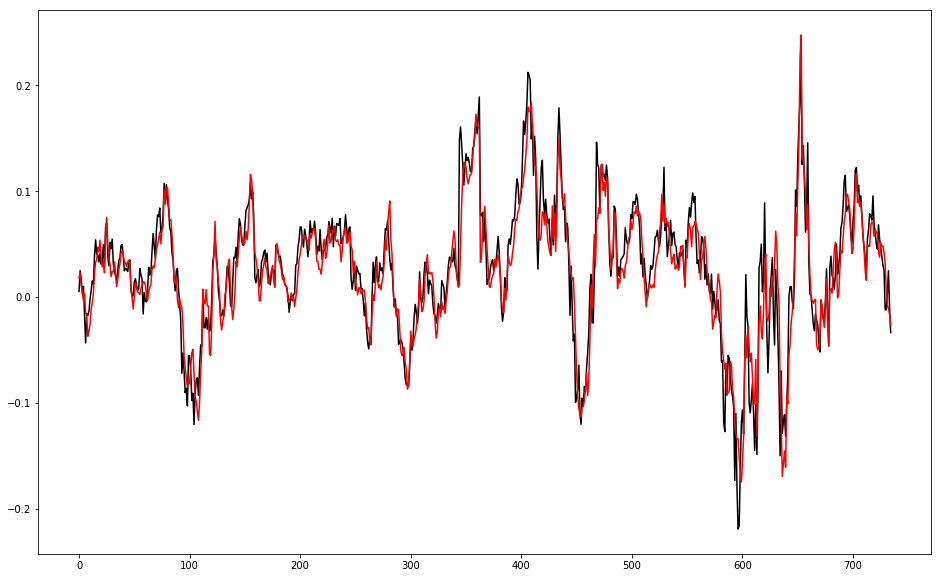

In [18]:
# Inference: predict next timestep
predictions = test(model, x_test, prediction_length=1)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="black")
ax.plot(predictions, color="red")
plt.show()

In [19]:
print("R2 Score:", metrics.r2_score(predictions, y_test))

R2 Score: 0.8431639102708579


### Plot trendlines for longterm predictions

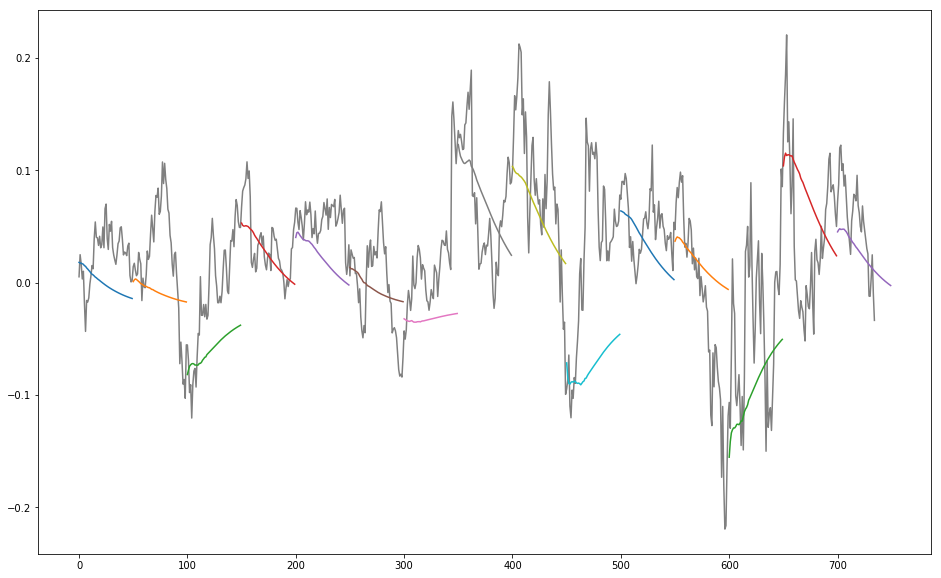

In [21]:
# Inference: predict next 20 timesteps
prediction_length = 50
predictions = test(model, x_test, prediction_length)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="gray")
for i, prediction in enumerate(predictions):
    padding = [None for p in range(i * prediction_length)]
    plt.plot(padding + prediction)
plt.show()


## Stacked LSTM

In [22]:
# Create Stacked LSTM: 3 LSTM layers plus output layer
class StackedLSTM(gluon.nn.HybridBlock):
    
    def __init__(self, **kwargs):
        
        super(StackedLSTM, self).__init__(**kwargs)
        
        with self.name_scope():
            # NTC = data in the format of batch, time, channel
            self.lstm = gluon.nn.HybridSequential()#rnn.HybridSequentialRNNCell()
            self.lstm.add(gluon.rnn.LSTM(100, layout="NTC", dropout=0.2))
            self.lstm.add(gluon.rnn.LSTM(100, layout="NTC"))       
            self.lstm.add(gluon.rnn.LSTM(100, layout="NTC", dropout=0.2))
            
            # prediction layer
            self.dense = gluon.nn.Dense(1)
            
    # forward takes input and LSTM state vector        
    def hybrid_forward(self, F, x):
        x = self.lstm(x)
        x = self.dense(x)
        
        #return prediction and state vector
        return x

### Train and plot inference results


In [23]:
# Create model
model= StackedLSTM()
model.hybridize()

# load pretrained model
model.load_parameters("data/stackedLSTM.params", ctx=ctx)
# Loss
l2loss = gluon.loss.L2Loss()

# Trainer
optimizer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': 1e-4})

#Training Loop
#train(model, train_dataloader)


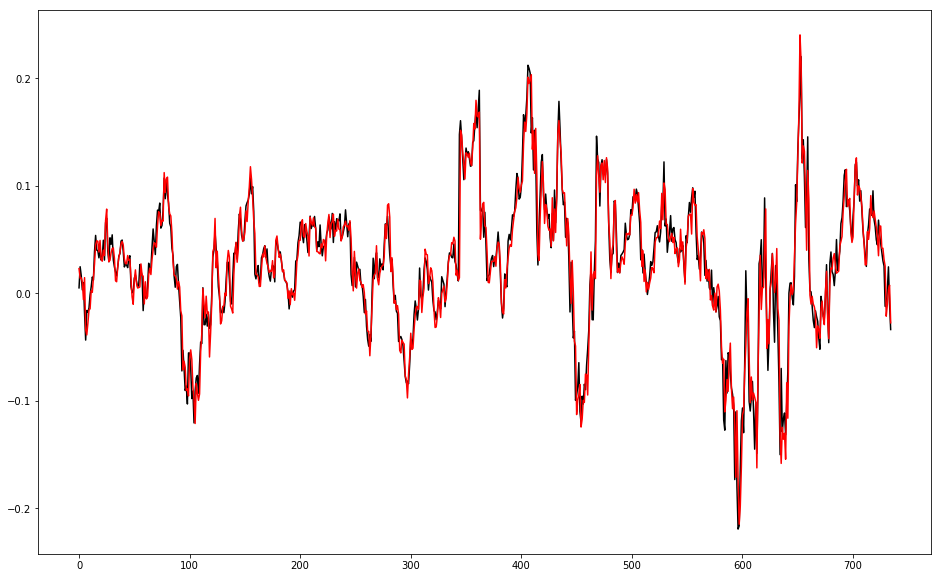

In [24]:
predictions = test(model, x_test, prediction_length=1)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="black")
ax.plot(predictions, color="red")
plt.show()

In [25]:
print("R2 Score:", metrics.r2_score(predictions, y_test))

R2 Score: 0.9192619067746224


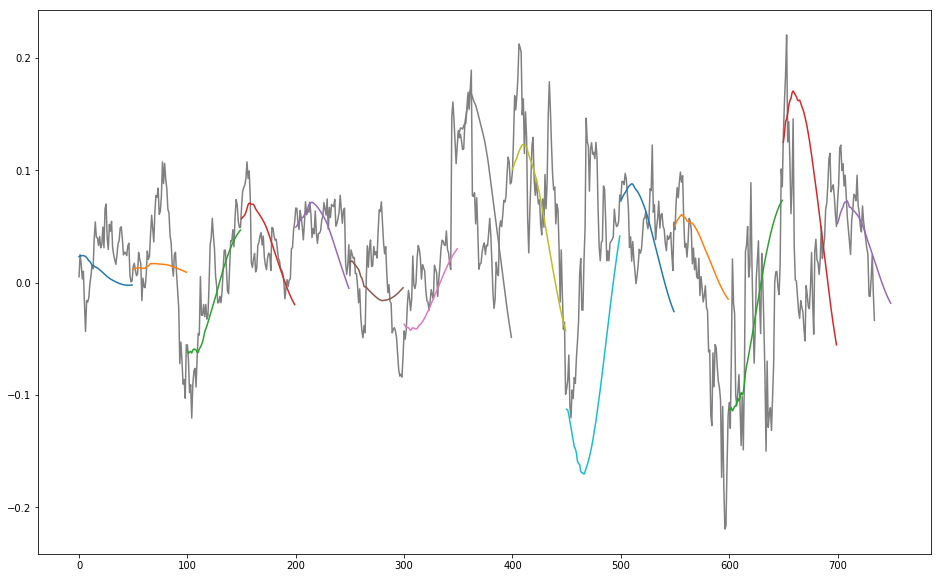

In [26]:
prediction_length = 50 
predictions = test(model, x_test, prediction_length)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="gray")

for i, prediction in enumerate(predictions):
    padding = [None for p in range(i * prediction_length)]
    plt.plot(padding + prediction)
plt.show()

- multivariate time series often involves long-term and short term patterns --> tradional approaches (Gaussian, Autorgressive) may fail
- LSTNet: uses CNN to find short-term dependencies amd RMM to find long-term dependencies
- LSTNet can process multi-dimensional input data
- LSTNet uses recurrent-skip connections to capture very long dependency patterns
- Goal: find shift-invariant local patterns

Related background:
- ARIMA:
    - ARIMA is an autoregressive model: it works on univariate time series data and it applies a moving average
    - ARIMA is computional expensive and as such not useful for multuivariate timeseries
- VAR:
    - vector autoregression models (VAR) are widely used in multivariate time series due to its simplicity
    - VAR ignores dependencies between output variables
    - capacity of VAR grows quadratically over the number of variables and therefore prone to overfitting
- Gaussien Processes:
    - non parametric method for modelling distributions over a continous domain of functions --> high computional complexity (cubic complexity)
    


    
    

### LSTNet

![](https://raw.githubusercontent.com/opringle/multivariate_time_series_forecasting/master/docs/model_architecture.png)
*Taken from https://arxiv.org/pdf/1703.07015.pdf*

In [27]:
from __future__ import print_function

import mxnet as mx
from mxnet import nd, gluon
from mxnet.gluon import nn, rnn

In [28]:
class LSTNet(gluon.HybridBlock):
    """
    LSTNet auto-regressive block
    """

    def __init__(self, num_series, conv_hid, gru_hid, skip_gru_hid, skip, ar_window, data_window):
        super(LSTNet, self).__init__()
        dropout_rate = 0.2
        self.skip = skip
        self.kernel_size = 6
        self.num_series = num_series
        self.ar_window = ar_window
        # calculate output shape of channel assuming padding=0 and step=1
        self.conv_output_shape = data_window - (self.kernel_size - 1)
        # Slice off multiples of skip from convolution output
        self.channels_rounded_to_skip_count = self.conv_output_shape // self.skip * self.skip
        self.skip_by_c_dims = skip_gru_hid * self.skip

        with self.name_scope():
            self.conv = nn.Conv1D(conv_hid, kernel_size=self.kernel_size, layout='NCW',
                                  activation='relu')
            self.dropout = nn.Dropout(dropout_rate)
            self.gru = rnn.GRU(gru_hid, layout='TNC')
            self.skip_gru = rnn.GRU(skip_gru_hid, layout='TNC')
            self.fc = nn.Dense(num_series)
            self.ar_fc = nn.Dense(1)

    def hybrid_forward(self, F, x, *args, **kwargs):
   
        # Convolution
        # Transpose NTC to to NCT (a.k.a NCW) before convolution
        c = self.conv(x.transpose((0, 2, 1)))
        c = self.dropout(c)

        # GRU
        r = self.gru(c.transpose((2, 0, 1)))  # Transpose NCT to TNC before GRU
        r = r.slice_axis(axis=0, begin=-1, end=None).squeeze(axis=0)  # Only keep the last output
        r = self.dropout(r)  # Now in NC layout

        # Skip GRU
        # take only last `channels_rounded_to_skip_count` channels
        skip_c = c.slice_axis(axis=2, begin=-self.channels_rounded_to_skip_count, end=None)

        # Reshape to NCT x skip
        skip_c = skip_c.reshape((0, 0, -4, -1, self.skip))
        # Transpose to T x N x skip x C
        skip_c = skip_c.transpose((2, 0, 3, 1))
        # Reshape to Tx (Nxskip) x C
        skip_c = skip_c.reshape((0, -3, -1))

        s = self.skip_gru(skip_c)

        # Only keep the last output (now in (Nxskip) x C layout)
        s = s.slice_axis(axis=0, begin=-1, end=None).squeeze(axis=0)
        # Now in N x (skipxC) layout
        s = s.reshape((-1, self.skip_by_c_dims))

        # FC layer
        fc = self.fc(F.concat(r, s))  # NC layout

        # Autoregressive highway
        ar_x = x.slice_axis(axis=1, begin=-self.ar_window,
                            end=None)  # NTC layout
        ar_x = ar_x.transpose((0, 2, 1))  # NCT layout
        ar_x = ar_x.reshape((-3, -1))  # (NC) x T layout
        ar = self.ar_fc(ar_x)
        ar = ar.reshape((-1, self.num_series))  # NC layout

        # Add autoregressive and fc outputs
        res = fc + ar
        return res

In [29]:
def create_normalized_data(data, sequence_length, horizon=24):
    
    # number of time series values
    n_samples = data.shape[0] 
    
    # number of time series
    columns = data.shape[-1]
    
    # create empty matrices n_samples x sequence_length x 1
    x = np.zeros((n_samples - sequence_length, sequence_length , columns), dtype=np.float32)
    y = np.zeros((n_samples - sequence_length, columns), dtype=np.float32)
    
    # create normalized sequences
    for i in range(0, n_samples - sequence_length): 
        
        #iterate over features
        for col in range(columns):
            
            # get window
            window = data[i : i + sequence_length + horizon,:] 

            # normalize
            normalized = [((float(p) / float(window[0,col])) - 1) for p in window[:,col]]    
            
            # assign 
            x[i,:,col]   = normalized[:sequence_length]
            y[i,col]     = normalized[-1]
             
    return x, y

In [30]:
# how many past time steps to consider
sequence_length = 168

# batch size
batch_size = 128

# get data
df = pd.read_csv('data/AMZN.csv')
data = df[["Close","Volume"]].values

# split train/test
n = int(data.shape[0] * 0.85)


# get normalized train and test dataset 
x_train, y_train = create_normalized_data(data[:n,:], sequence_length)
x_test, y_test   = create_normalized_data(data[n:,:], sequence_length)

# create Dataloader
dataset = gluon.data.ArrayDataset(x_train, y_train)
train_dataloader = gluon.data.DataLoader(dataset, batch_size=batch_size, last_batch="rollover", shuffle=True)

In [31]:
# Create LSTNet model
model = LSTNet(num_series=2, conv_hid=100, gru_hid=100, skip_gru_hid=5, skip=24, ar_window=24, data_window=168)

model.initialize()
model.load_parameters("data/lstnet.params")
model.hybridize(static_alloc=True, static_shape=True)

# Loss
l2loss = gluon.loss.L2Loss()

# Trainer
optimizer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': 1e-3})

# create Dataloader
dataset = gluon.data.ArrayDataset(x_train, y_train)
train_dataloader = gluon.data.DataLoader(dataset, batch_size=batch_size, last_batch="rollover", shuffle=True)

#Training Loop
train(model, train_dataloader)


epoch [1/5], loss:0.0094415
epoch [2/5], loss:0.0098096
epoch [3/5], loss:0.0086780
epoch [4/5], loss:0.0105501
epoch [5/5], loss:0.0084248



<img src="data/lstnet.gif" alt="drawing" width="1200"/>

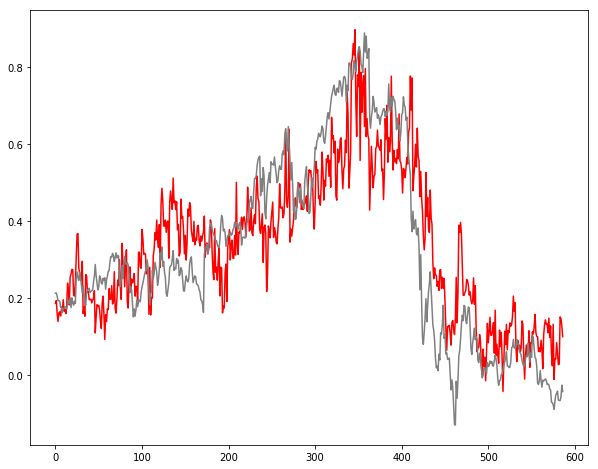

In [32]:
prediction_sequences = []
for i in range(0, x_test.shape[0]):

    # Batchify
    sequence = mx.nd.expand_dims(mx.nd.array(x_test[i,:,:]), axis=0)

    # Load data on GPU
    sequence = sequence.as_in_context(ctx)

    # Predict
    predicted = model(sequence)

    #Store
    prediction_sequences.append(predicted[0,0].asscalar())

# Plot
fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)
ax.plot(prediction_sequences, color="red")
ax.plot(y_test[:,0], color="gray")
plt.show() 

In [44]:
print("R2 Score:", metrics.r2_score(prediction_sequences, y_test[:,0]))

R2 Score: 0.6242292927363842


### DeepAR

- SageMaker builtin algorithm
- forecasting algorithm using RNNs
- one-dimensional timer series
- Part of Gluon-TS toolkit https://github.com/awslabs/gluon-ts

![](https://docs.aws.amazon.com/sagemaker/latest/dg/images/ts-full-159.sampled.png)